In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [16]:
for col in train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(train[col].isnull().sum()/train[col].shape[0]))
    print(msg)
                                                                  

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [17]:
for col in test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(test[col].isnull().sum()/test[col].shape[0]))
    print(msg)
                      

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


<AxesSubplot:>

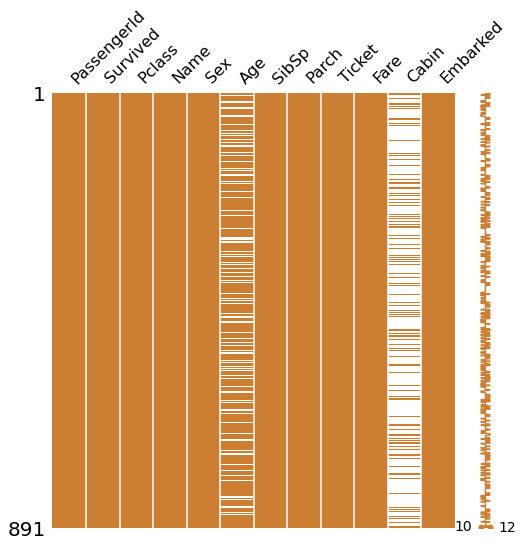

In [20]:
import missingno as msno

msno.matrix(df=train.iloc[:,:], figsize = (8,8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

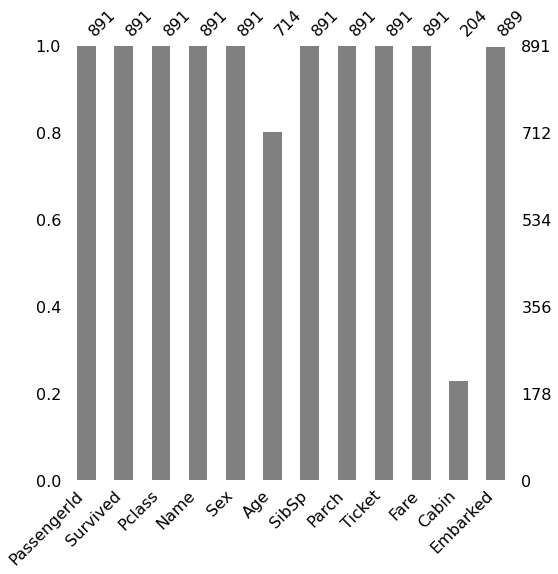

In [48]:
msno.bar(df=train.iloc[:,:], figsize = (8,8), color=(0.5, 0.5, 0.5))


In [59]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

f, ax = plt.subplots(1, 2, figsize = (18, 8))

train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [36]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts()
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    
    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + "\'s ratio in total'")
    plt.show()
    
    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size+1, i+1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survived', 'Dead'], autopct="%1.1f%%")
        plt.title(str(index)+"\'s ratio'")
    
    plt.show()


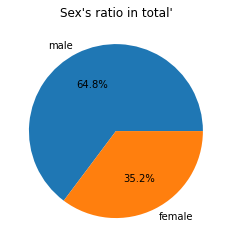

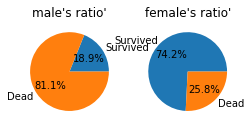

In [37]:
pie_chart('Sex')

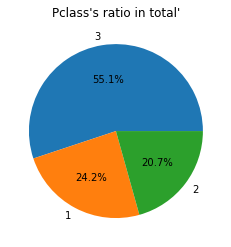

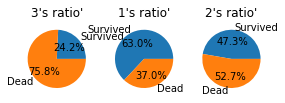

In [38]:
pie_chart('Pclass')

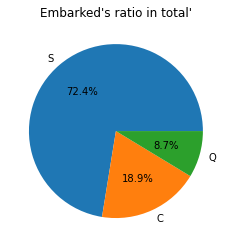

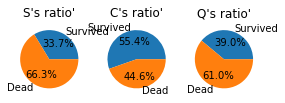

In [39]:
pie_chart('Embarked')

In [49]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

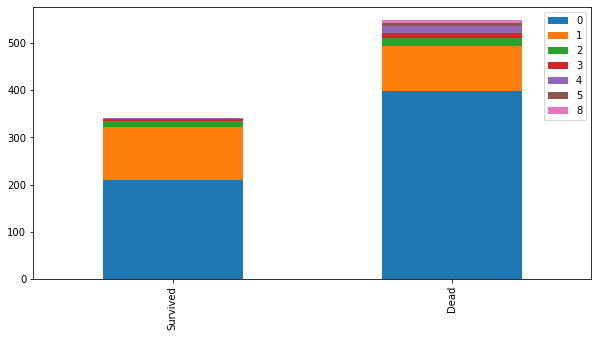

In [50]:
bar_chart("SibSp")

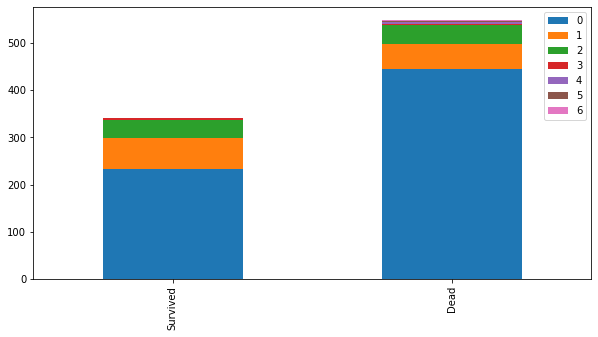

In [51]:
bar_chart("Parch")

In [52]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

Survived
Pclass          
1            216
2            184
3            491

In [53]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

Survived
Pclass          
1            136
2             87
3            119

In [60]:
pd.crosstab(train['Pclass'], train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

<AxesSubplot:xlabel='Pclass'>

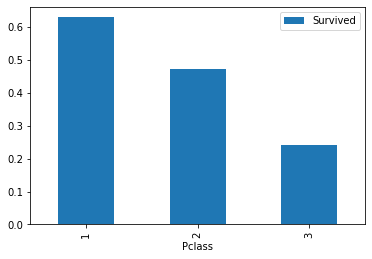

In [61]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by="Survived", ascending=False).plot.bar()

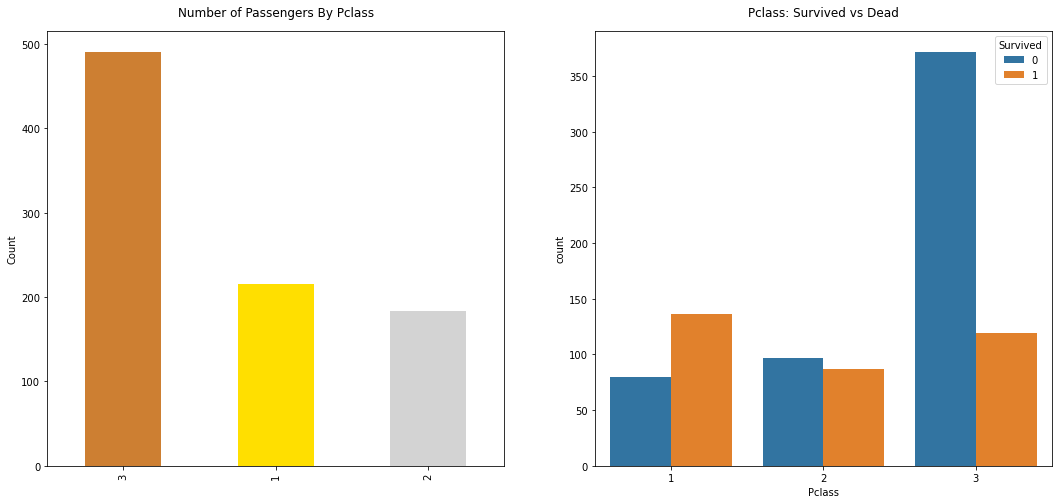

In [63]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32',  '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue="Survived", data=train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

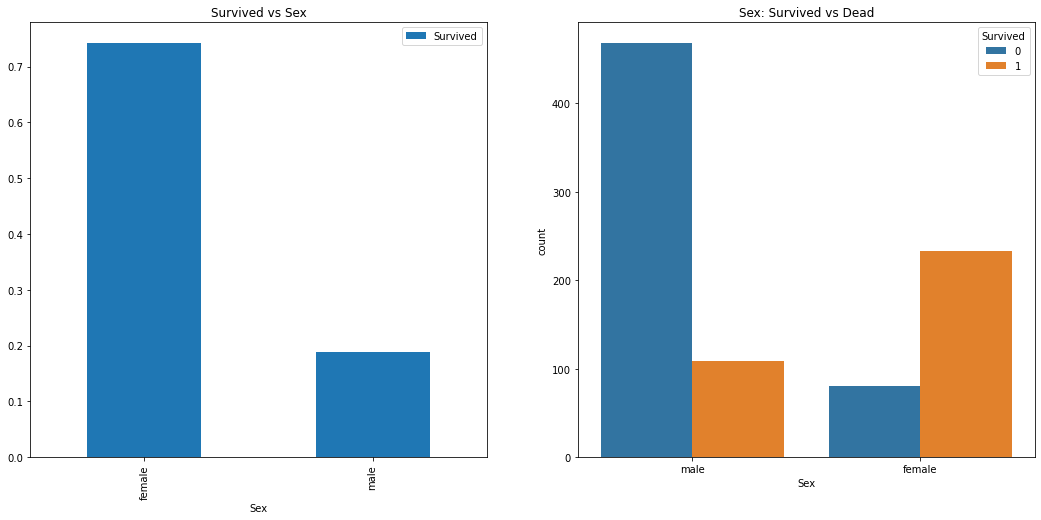

In [66]:
f, ax = plt.subplots(1, 2 , figsize=(18,8))
train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue="Survived", data=train, ax=ax[1])
ax[1].set_title("Sex: Survived vs Dead")
plt.show()

In [68]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by="Survived", ascending=False)

Survived
Sex             
female  0.742038
male    0.188908

In [67]:
pd.crosstab(train['Sex'], train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

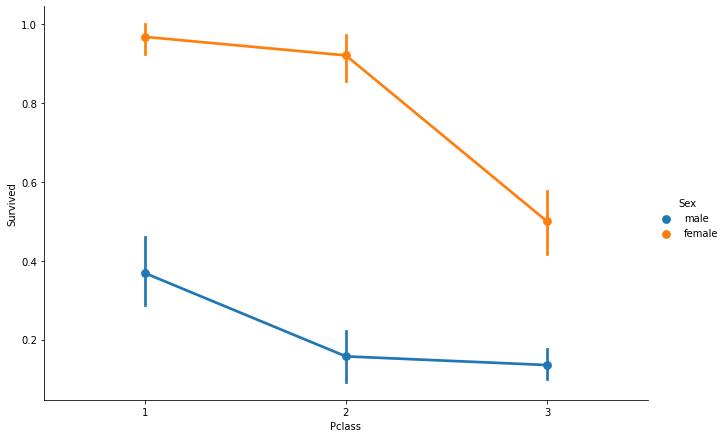

In [71]:
sns.factorplot('Pclass', 'Survived', hue="Sex", data=train, size=6, aspect=1.5)

In [87]:
sns.factorplot(x = 'Sex', y='Survived', col="Pclass", data=train, satureaction=.5, size=9, aspect=1)

In [89]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(train['Age'].min()))
print('탑승객 평균 나의 : {:.1f} Years'.format(train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나의 : 29.7 Years


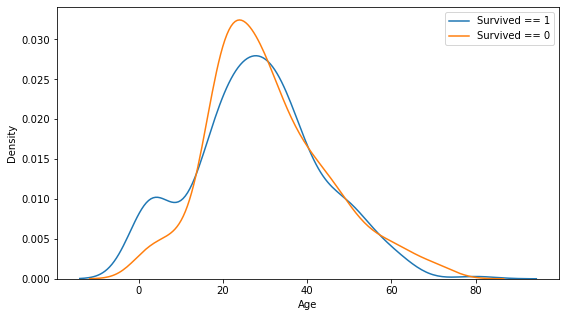

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(train[train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(train[train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])

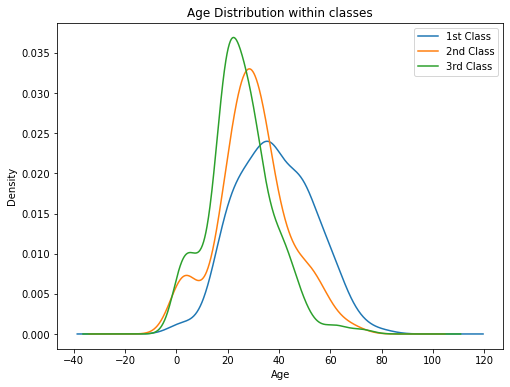

In [92]:
plt.figure(figsize=(8, 6))
train['Age'][train['Pclass'] == 1].plot(kind='kde')
train['Age'][train['Pclass'] == 2].plot(kind='kde')
train['Age'][train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

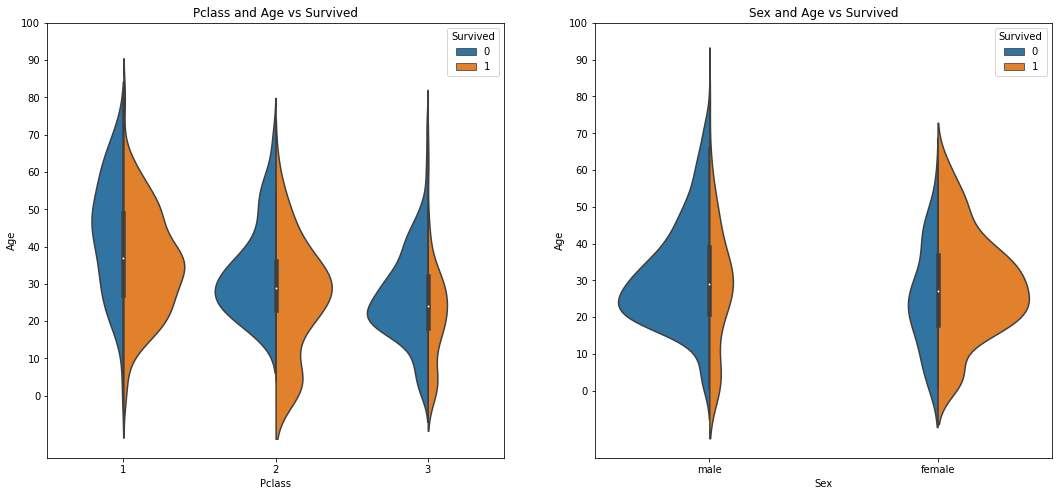

In [96]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass", 'Age', hue="Survived", data=train, scale='count', split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex", 'Age', hue="Survived", data=train, scale='count', split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))

<AxesSubplot:xlabel='Embarked'>

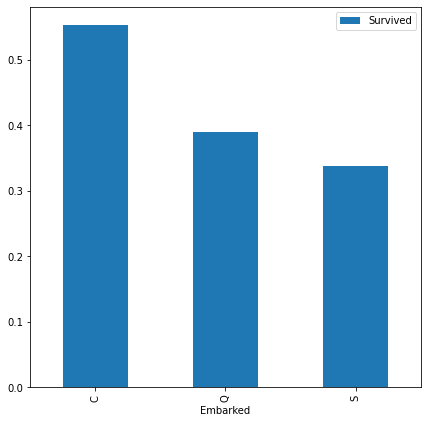

In [98]:
f, ax = plt.subplots(1,1,figsize=(7,7))
train[["Embarked", 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by="Survived", ascending=False).plot.bar(ax=ax)

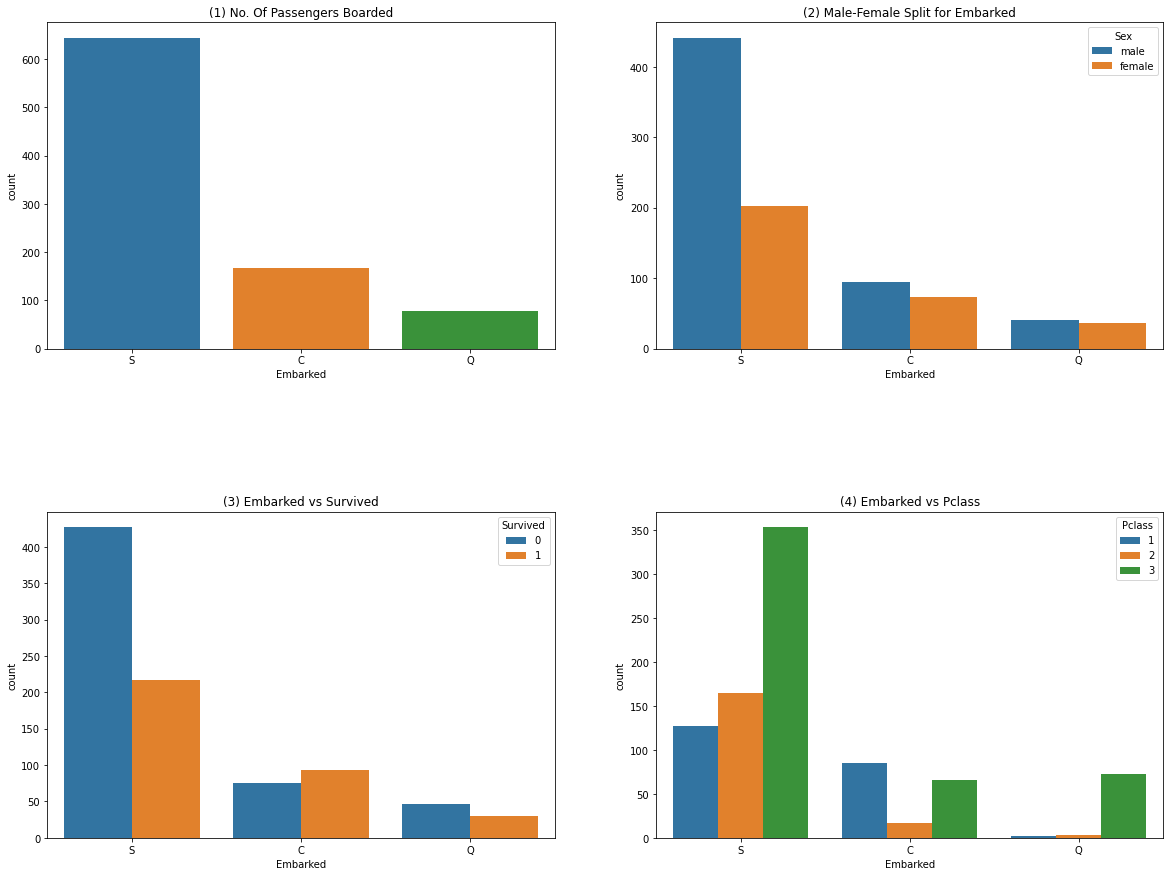

In [100]:
f, ax =plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=train, ax=ax[0,0])
ax[0,0].set_title("(1) No. Of Passengers Boarded")
sns.countplot('Embarked',hue='Sex' ,data=train, ax=ax[0,1])
ax[0,1].set_title("(2) Male-Female Split for Embarked")
sns.countplot('Embarked', hue="Survived" ,data=train, ax=ax[1,0])
ax[1,0].set_title("(3) Embarked vs Survived")
sns.countplot('Embarked', hue="Pclass", data=train, ax=ax[1,1])
ax[1,1].set_title("(4) Embarked vs Pclass")
plt.subplots_adjust(wspace=0.2, hspace=0.5)